In [136]:
import qiskit as qk

In [222]:
# target machine
sim = qk.Aer.get_backend('qasm_simulator')
# size of the walk in qubits
qdim = 6
# number of steps
steps = 10#2**(qdim-1)
init = qdim-1
print('Number of qubits:', qdim)
print('Number of steps:', steps, 'of', 2**qdim-1)
print('Initial position:', init)

Number of qubits: 6
Number of steps: 10 of 63
Initial position: 5


In [223]:
# allocate main registers
qcoin = qk.QuantumRegister(1, name='coin')
qr = qk.QuantumRegister(qdim, name='nodes')
cr = qk.ClassicalRegister(qdim, name='stats')
qc = qk.QuantumCircuit()

# add registers to the circuit
qc.add_register(qcoin)
qc.add_register(qr)
qc.add_register(cr)

In [224]:
# initial state of the coin
qc.h(qcoin)
qc.s(qcoin)
qc.barrier()

# starting position 
qc.x(qr[init])
qc.barrier()

In [225]:
def increment(qc, qr, qdim):
    for i in range(qdim):
        qc.mct(qr[0:qdim - i], qr[qdim - i], None, mode='noancilla')
        
def decrement(qc, qr, qdim):
    for i in range(qdim):
        qc.x(qr[0:qdim - i])
        qc.mct(qr[0:qdim - i], qr[qdim - i], None, mode='noancilla')
        qc.x(qr[0:qdim - i])

In [226]:
# main loop
# walks are implemented using multi-control Toffoli without ancilla
for _ in range(steps):
    qc.h(qcoin)
    increment(qc, qc.qubits, qdim)
    decrement(qc, qc.qubits, qdim)

In [227]:
# final measurement
# ignore the coin (qc.qubits[0]) register
qc.measure(qr, cr);

In [228]:
# makes sense only for small circuits
# qc.draw(output='mpl') 

In [229]:
job = qk.execute(qc, sim, shots=300)
counts = job.result().get_counts(qc)

decode_counts = {}
for key, value in counts.items():
    decode_counts[str(int(key,2))] =  value

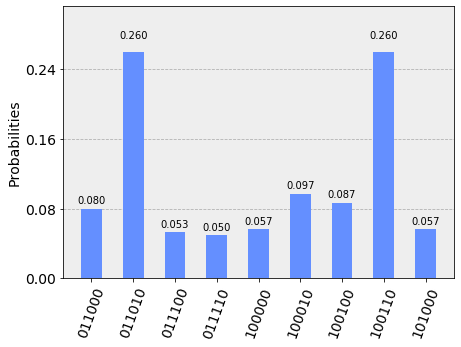

In [230]:
qk.visualization.plot_histogram(counts)

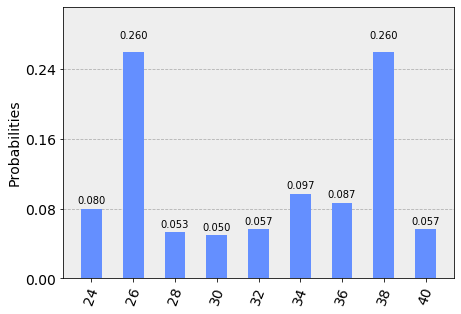

In [231]:
qk.visualization.plot_histogram(decode_counts)